Framework: Tensorflow 2.0

Linear Regression on Moore's law which says that the number of transistors on a microchip doubles about every two years

Our original model for exponential growth is:

$$ C = A_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log A_0 $$

This is our linear equation:

$$ \hat{y} = ax + b $$

Where:

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.34188038 $$

so that:

$$ r = e^{0.34188038} = 1.4076 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = A_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = A_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (A_0 r ^ {t'}) / A_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.


In [1]:
#Load all neccesary packages
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Download the Moore dataset
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-12 06:55:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-12 06:55:59 (25.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [23]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1) # make the dimention into 2D array = N*D
Y = data[:,1]
print(X.shape, Y.shape)

(162, 1) (162,)


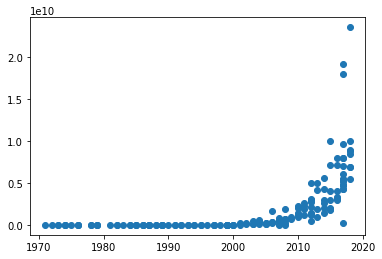

In [26]:
#Plot the X and Y to see the data distribution
plt.scatter(X,Y)

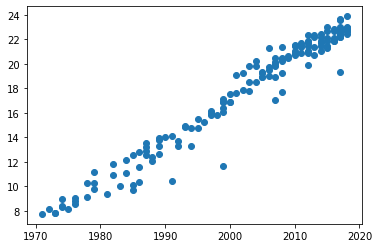

In [27]:
#Since data is exponential, take log of values to make it linear
Y = np.log(Y)
plt.scatter(X,Y)

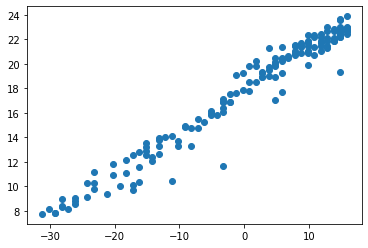

In [32]:
#Scale the X data as well
X = X-X.mean()
plt.scatter(X,Y)

In [37]:
#Build our TensorFlow model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,activation=None,input_shape=(1,)))

#define loss and optimizer
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

#Fit or Train the model

#learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X,Y,epochs=200,callbacks=[scheduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 317.3199
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 312.5287
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 407.9771
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 488.8275
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 308.3091
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 202.5983
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 90.8874
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 63.7881
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 49.9363
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 38.4848
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 25.1166
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 18.5172
Epoch 13/200
6/6 [=========================

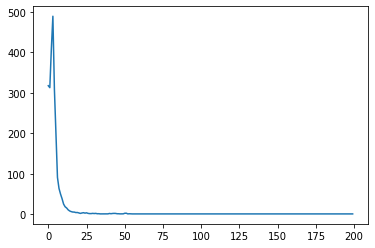

In [38]:
plt.plot(r.history['loss'],label='loss')

In [42]:
#Get the slope of a line
print(model.layers[0].get_weights())

[array([[0.34037513]], dtype=float32), array([17.761543], dtype=float32)]


In [55]:
#Slope of a line is
a= model.layers[0].get_weights()[0][0,0]
a

0.34037513

In [57]:
print("Time to double count: ",np.log(2)/a)

Time to double count:  2.0364213740023858


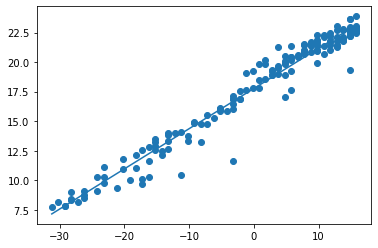

In [58]:
#Time to predict
pred= model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,pred)